# Plotting behavorial data generated by OpenSesame

In the data wrangling tutorial we covered how to import and manipulate a dataframe. We also saw some ways to get an idea how your data looks like by grouping the data. In this tutorial we will go a step further by also visualizing the data. Therefore, we will use python's most widely used visualization package: [matplotlib](https://matplotlib.org/). Let's first load the data. We will use the same data as in the data wrangling tutorial.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# disable chained assignments
pd.options.mode.chained_assignment = None

subj1 = pd.read_csv("data/subject-3.csv", sep=",")
subj2 = pd.read_csv("data/subject-4.csv", sep=",")

df = pd.concat([subj1, subj2], ignore_index=True)

include_columns = ['subject_nr', 'block', 'session', 'congruency_transition_type', 'congruency_type',
                   'correct', 'response_time', 'task_transition_type', 'task_type', 'cue_color']

df_trim = df[include_columns]
df_trim['subject_nr'] = df_trim['subject_nr'].astype('category')
df_trim['correct'] = df_trim['correct'].astype('category')

df_trim_blocks = df_trim[df_trim['block'] < 11]

df_trim_blocks['subject_nr'] = df_trim_blocks['subject_nr'].replace(3, 1)
df_trim_blocks['subject_nr'] = df_trim_blocks['subject_nr'].replace(4, 2)

df_trim_blocks

,subject_nr,block,session,congruency_transition_type,congruency_type,correct,response_time,task_transition_type,task_type,cue_color
0,1,1,lowswitch,NaN,incongruent,0,1482.9738,NaN,parity,#7BB2D0
1,1,1,lowswitch,congruency-switch,congruent,1,706.7057,task-switch,magnitude,#A6A0C6
2,1,1,lowswitch,congruency-repetition,congruent,1,855.6105,task-switch,parity,#7BB2D0
3,1,1,lowswitch,congruency-switch,incongruent,1,867.8947,task-repetition,parity,#CDA277
4,1,1,lowswitch,congruency-repetition,incongruent,1,1078.9412,task-switch,magnitude,#A6A0C6
...,...,...,...,...,...,...,...,...,...,...
811,2,10,highswitch,congruency-switch,incongruent,1,844.0940,task-switch,magnitude,#8FBF35
812,2,10,highswitch,congruency-repetition,incongruent,1,674.5391,task-switch,parity,#A6A0C6
813,2,10,highswitch,congruency-repetition,incongruent,0,789.6114,task-repetition,parity,#7BB2D0
814,2,10,highswitch,congruency-switch,congruent,1,1353.6886,task-switch,magnitude,#CDA277


,subject_nr,block,session,congruency_transition_type,congruency_type,correct,response_time,task_transition_type,task_type,cue_color
0,1,1,lowswitch,NaN,incongruent,0,1482.9738,NaN,parity,#7BB2D0
1,1,1,lowswitch,congruency-switch,congruent,1,706.7057,task-switch,magnitude,#A6A0C6
2,1,1,lowswitch,congruency-repetition,congruent,1,855.6105,task-switch,parity,#7BB2D0
3,1,1,lowswitch,congruency-switch,incongruent,1,867.8947,task-repetition,parity,#CDA277
4,1,1,lowswitch,congruency-repetition,incongruent,1,1078.9412,task-switch,magnitude,#A6A0C6
...,...,...,...,...,...,...,...,...,...,...
811,2,10,highswitch,congruency-switch,incongruent,1,844.0940,task-switch,magnitude,#8FBF35
812,2,10,highswitch,congruency-repetition,incongruent,1,674.5391,task-switch,parity,#A6A0C6
813,2,10,highswitch,congruency-repetition,incongruent,0,789.6114,task-repetition,parity,#7BB2D0
814,2,10,highswitch,congruency-switch,congruent,1,1353.6886,task-switch,magnitude,#CDA277


In [38]:
plt.style.use('classic')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


As you learned in the Python Lessons, there are three ways of using matplotlib: the seaborn way (quick, beautiful but limited options), the procedural way (quick and rigid) and the object-oriented way (slower but more flexible). Let's visualize switch costs using these three methods whilst minimizing the amount of code we use, so we can compare them:

<AxesSubplot:xlabel='session', ylabel='response_time'>

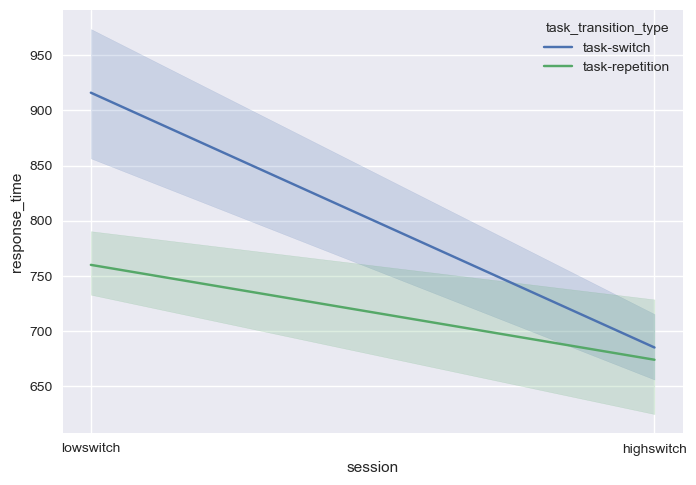

In [24]:
sns.lineplot(data=df_trim_blocks, x='session', y='response_time', hue='task_transition_type')

As you can see, with only one line of code we can visualize the switch cost difference. However, seaborn also does things we didn't ask for: it calculates the mean response time and gives us an error bar. We can explicitly change these settings of course, but it does illustrate a difference in coding philosophy: with the object-oriented way you build from the ground up, whilst in the seaborn (and the lesser extent the procedural way) you built from the top down. Let's see what happens with the procedural approach:

<AxesSubplot:xlabel='session'>

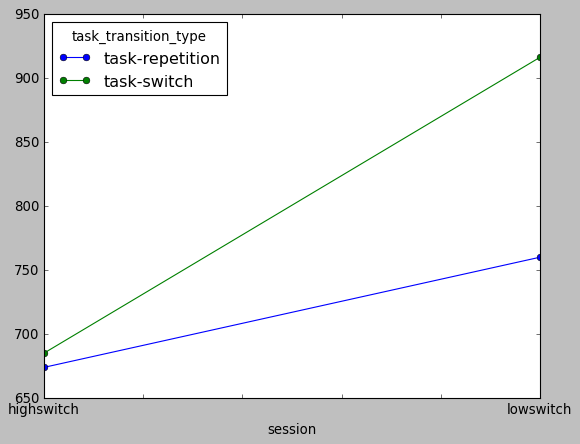

In [39]:
df_trim_blocks.pivot_table("response_time", "session", "task_transition_type").plot(marker="o")

Alright, we don't get the error bars, and the y-axis is flipped. The style also is a bit retro, but you can change the style to whatever you like most. See the styles available [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). Lets change the style and look at the new output right away:

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<function matplotlib.pyplot.show(close=None, block=None)>

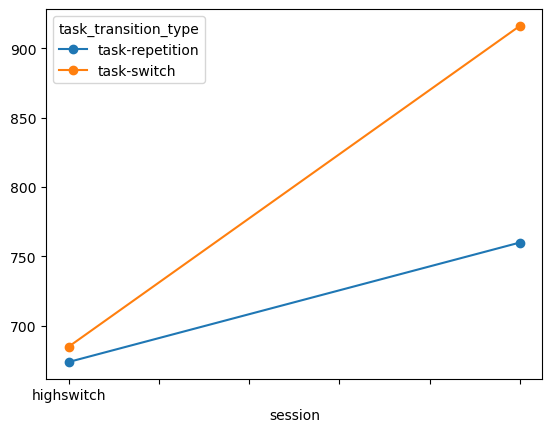

In [60]:
print(plt.style.available) # Print out all available styles
plt.style.use('default') # Set style for the rest of the script

# New style output
df_trim_blocks.pivot_table("response_time", "session", "task_transition_type").plot(marker="o")

Some tweaking needs to be done now since the x-label "lowswitch" now falls out of the plot grid (depending on some styles). But again, with one line of code we get a pretty good idea of how the switch cost looks like between conditions. Let's now try the object-oriented approach:

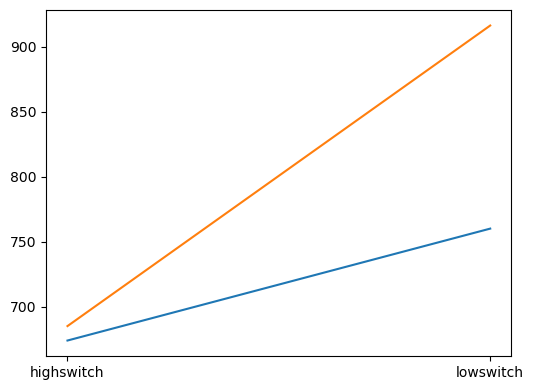

In [58]:
df = df_trim_blocks.groupby(['session','task_transition_type']).response_time.mean()

# unstack the `task_transition_type` index, to place it as columns
df_oo = df.unstack(level='task_transition_type')

fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(df_oo)
plt.show()

As you can see you need the most code for the object-oriented approach. Furthermore, it doesn't give you anything you don't ask for. We didn't specify if we wanted a legend, or if we wanted x- and y-labels, so we will then need to add this manually. It is however the best way to make your plots, since (1) the procedural and seaborn approach are built on the object-oriented syntax, so you can make changes to these plots with your understanding of object-oriented matplotlib usage, and (2) it is the most reproducible way to code your plots, since you make everything what you do explicit.

It's important to be aware of the difference between these approaches, as when you google solutions for your matplotlib problems, you will often encounter solutions for all three approaches. However, when you are coding in an object-oriented matter, simply inputting procedural code will not work, and vice-versa! For the rest of the tutorial, we will continue with the object-oriented approach, unless it is really inconvenient to do so (as you will see at the end of the tutorial). For now, let's improve the plot we made above:

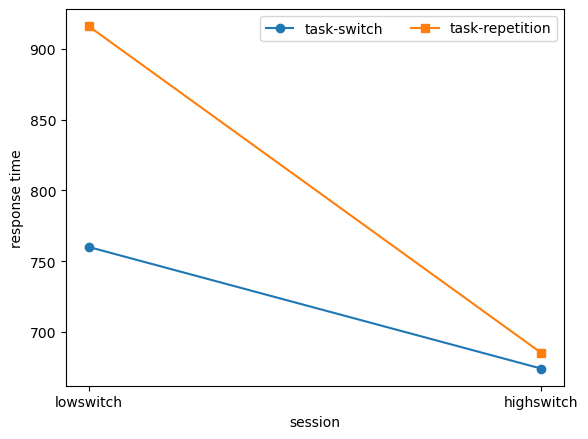

In [69]:
df = df_trim_blocks.groupby(['session','task_transition_type']).response_time.mean()

# unstack the `task_transition_type` index, to place it as columns
df_oo = df.unstack(level='task_transition_type')

# The name of columns would become the name of legend
# when using dataframe plot
df_oo.columns.name = 'response time'

fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(df_oo)
ax.invert_xaxis()

# set axis labels
ax.set_xlabel('session')
ax.set_ylabel('response time')

# set markers; "o" codes for "circle", "s" codes for "square"
markers = ['o', 's']
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

# update legend
ax.legend(ax.get_lines(), ["task-switch", "task-repetition"], loc='best', ncol=2)

plt.tight_layout()

Let's continue. Next thing to check is how the response time distribution looks like. Many statistical tests assume a normal distribution, but is that the case in our response time distribution as well? Using matplotlib.pyplot we can easily make a histogram plot by specifying the column that should be plotted:

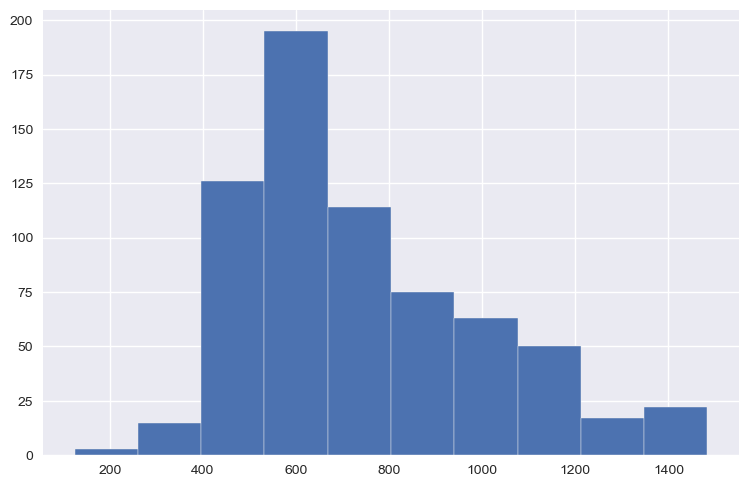

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [27]:
fig, ax = plt.subplots()
ax.hist(df_trim_blocks['response_time'])
plt.show()
print(plt.style.available)

That's a good start. However, we are still missing lots of things in this plot. There are no labels for the x- and y-axis, there is no title for the plot, I think we need a few more bins, the graph could be a bit wider, and I am also not happy about the background colour. This is where the real power of object-oriented coding in matplotlib shows itself: you can customize virtually anything you want in these plots.

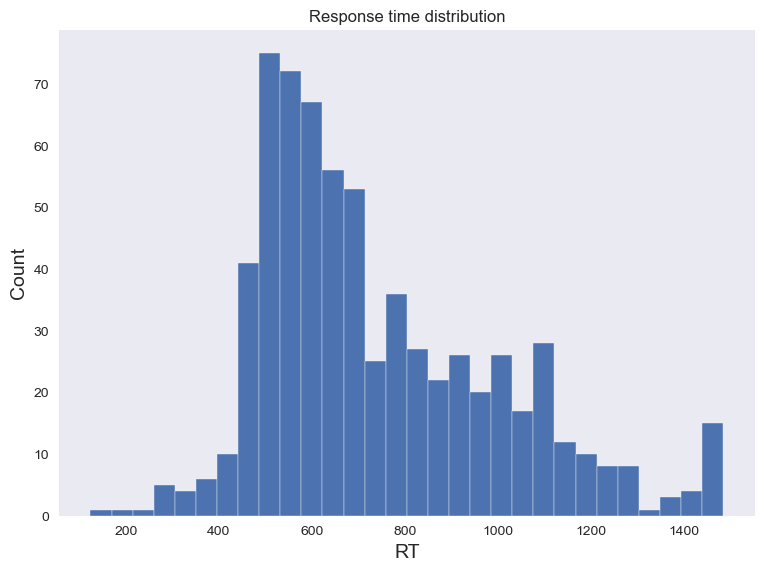

In [28]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
                       facecolor='grey', # Change background colour to grey
                       frameon=False)

ax.grid(visible=None) # Remove the background grid lines

ax.hist(df_trim_blocks['response_time'],
         bins=30) # Bins defines the amount of bins you want to plot

ax.set_xlabel("RT", size=14) # label on the x-axis, size defines font size
ax.set_ylabel("Count", size=14) # label on the y-axis, size defines font size
ax.set_title("Response time distribution") # title of the plot
plt.show()

We can also make overlays to compare two distributions. Let's for example see how the distribution of correct versus incorrect trials look like.

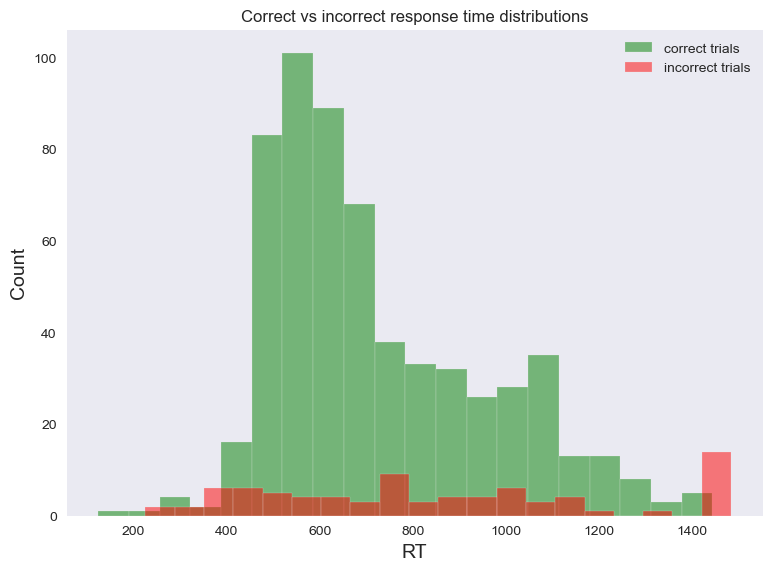

In [29]:
fig, ax = plt.subplots(figsize=(8,6), # Change size to width,height in inches
           facecolor='grey', # Change background colour to grey
           frameon=False) # Remove background behind the bars
ax.grid(visible=None) # Remove the background grid lines

# Here we make two dataframes, one with only correct trials and another with only incorrect trials
correct_trials = df_trim_blocks[df_trim_blocks['correct'] == 1]
incorrect_trials = df_trim_blocks[df_trim_blocks['correct'] == 0]

# Then we make two histograms. Matplotlib will automatically place items you make in the same figure.
ax.hist(correct_trials['response_time'],
         bins=20,
         alpha=0.5, # This defines opacity of the bars
         color='green',
         label="correct trials") # This defines the label that the bar gets, for the legend

ax.hist(incorrect_trials['response_time'],
         bins=20,
         alpha=0.5,
         color='red',
         label="incorrect trials")

ax.set_xlabel("RT", size=14)
ax.set_ylabel("Count", size=14)
ax.set_title("Correct vs incorrect response time distributions")
ax.legend(loc='upper right') # This tells matplotlib to create a legend, and place it on the upper right field of the plot
plt.show()

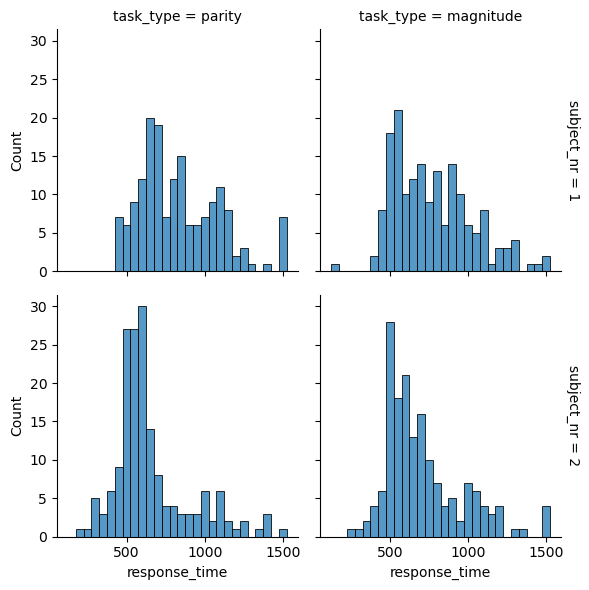

In [75]:
sns.displot(
    df_trim_blocks,
    x="response_time", # What to code on the x-axis
    col="task_type", # Column of the grid
    row="subject_nr", # Rows of the grid
    binwidth=50, # Width of the bins
    height=3, # Height of the figure
    facet_kws=dict(margin_titles=True),
)

In [ ]:

#df.head()

#df['acc']
#df.acc

#df.iloc[1]

#print(df['congruency'])

#df.shape

#dfg = df.groupby('subject_nr')
#dfg.mean()

#df.groupby('subject_nr').agg([np.sum, np.mean, np.std])


df['rt_zscore'] = df.groupby(['subject_nr','congruency'])['response_time'].transform(lambda x: (x-x.mean())/x.std())

print(df)


In [ ]:
plt.figure(figsize=(8,6));
plt.hist(df.query("congruency == 'inc' & rt_zscore <= 3").response_time, bins=100, alpha=0.5, label="data1");
plt.hist(df.query("congruency == 'inc' & rt_zscore > 3").response_time, bins=100, alpha=0.5, label="data2");

In [ ]:
import seaborn as sns

df['is_outlier'] = df['rt_zscore'] > 3

sns.set_theme(style="darkgrid")
sns.displot(
    df.query("subject_nr != 0"), x="response_time", col="congruency", row="subject_nr",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True), hue = "is_outlier",
)

In [ ]:
df

In [ ]:
df_sum = df.query("rt_zscore <= 3").groupby(['subject_nr','congruency'])['response_time'].mean()

In [ ]:
df_sum

### Exercise
We made the facet grid plot in seaborn out of convenience. However, with a bit more code we can also reproduce that plot in the object-oriented approach of matplotlib. Reproduce the plot in this way.

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(5.5, 3.5))

df_subj1_parity = df_trim_blocks[(df_trim_blocks['task_type'] == 'parity') & (df_trim_blocks['subject_nr'] == 1)]
df_subj2_parity = df_trim_blocks[(df_trim_blocks['task_type'] == 'parity') & (df_trim_blocks['subject_nr'] == 2)]
df_subj1_magnitude = df_trim_blocks[(df_trim_blocks['task_type'] == 'magnitude') & (df_trim_blocks['subject_nr'] == 1)]
df_subj2_magnitude = df_trim_blocks[(df_trim_blocks['task_type'] == 'magnitude') & (df_trim_blocks['subject_nr'] == 2)]

df_subj1_parity['response_time'].hist(ax=axs[0,0])
df_subj2_parity['response_time'].hist(ax=axs[0,1])
df_subj1_magnitude['response_time'].hist(ax=axs[1,0])
df_subj2_magnitude['response_time'].hist(ax=axs[1,1])

# Set common labels
fig.text(0.28, -0.03, 'Parity', ha='center', va='center')
fig.text(0.75, -0.03, 'Magnitude', ha='center', va='center')

axs[0,0].set_ylabel('Subject 1')
axs[1,0].set_ylabel('Subject 2')

plt.show()